# Honey Production Dataset - EDA

Lets consider a dataset from kaggle and will proceed with an EDA for the same.

Dataset :  https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021

## Objective:
To visualise how honey production is changed over the years (1995–2021) in the United States.

Key questions to be answered:
* How has honey production yield changed from 1995 to 2021 ?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

Lets see how we can do justice with our insights based on our EDA!

## Importing Necessary Packages

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white',)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Loading data

In [391]:
df = pd.read_csv('US_honey_dataset_updated.csv')


In [392]:
df.head()


,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [393]:
df.isna().sum()


Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [369]:
nan_count = df.isnull().sum().sum()
nan_count


0

Insight : 
The dataset looks clean and consistent and has all the description which was there in the data dictionary.

## Data types for the variables

In [370]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


Insights:
1. year is of int data type but for analysis we will convert it to categorical data
2. state is of object datatype.
3. remainig all are of int and float datatypes and are numerical data

## Describing the dataset

In [371]:
df.describe()


,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


Insights:
1. From numcol it looks like it has a wide range spread through all the states.
2. mean of numcol is close to the 75th percentile showing a right skew.
3. yieldpercol has also a wide range from 19 to 136.
4. All the remainig columns also have a wide range of data.We will investigate to find the spread across the different states.

## Checking relation between numerical columns and correlations  - pairplot()


<Figure size 2000x800 with 0 Axes>

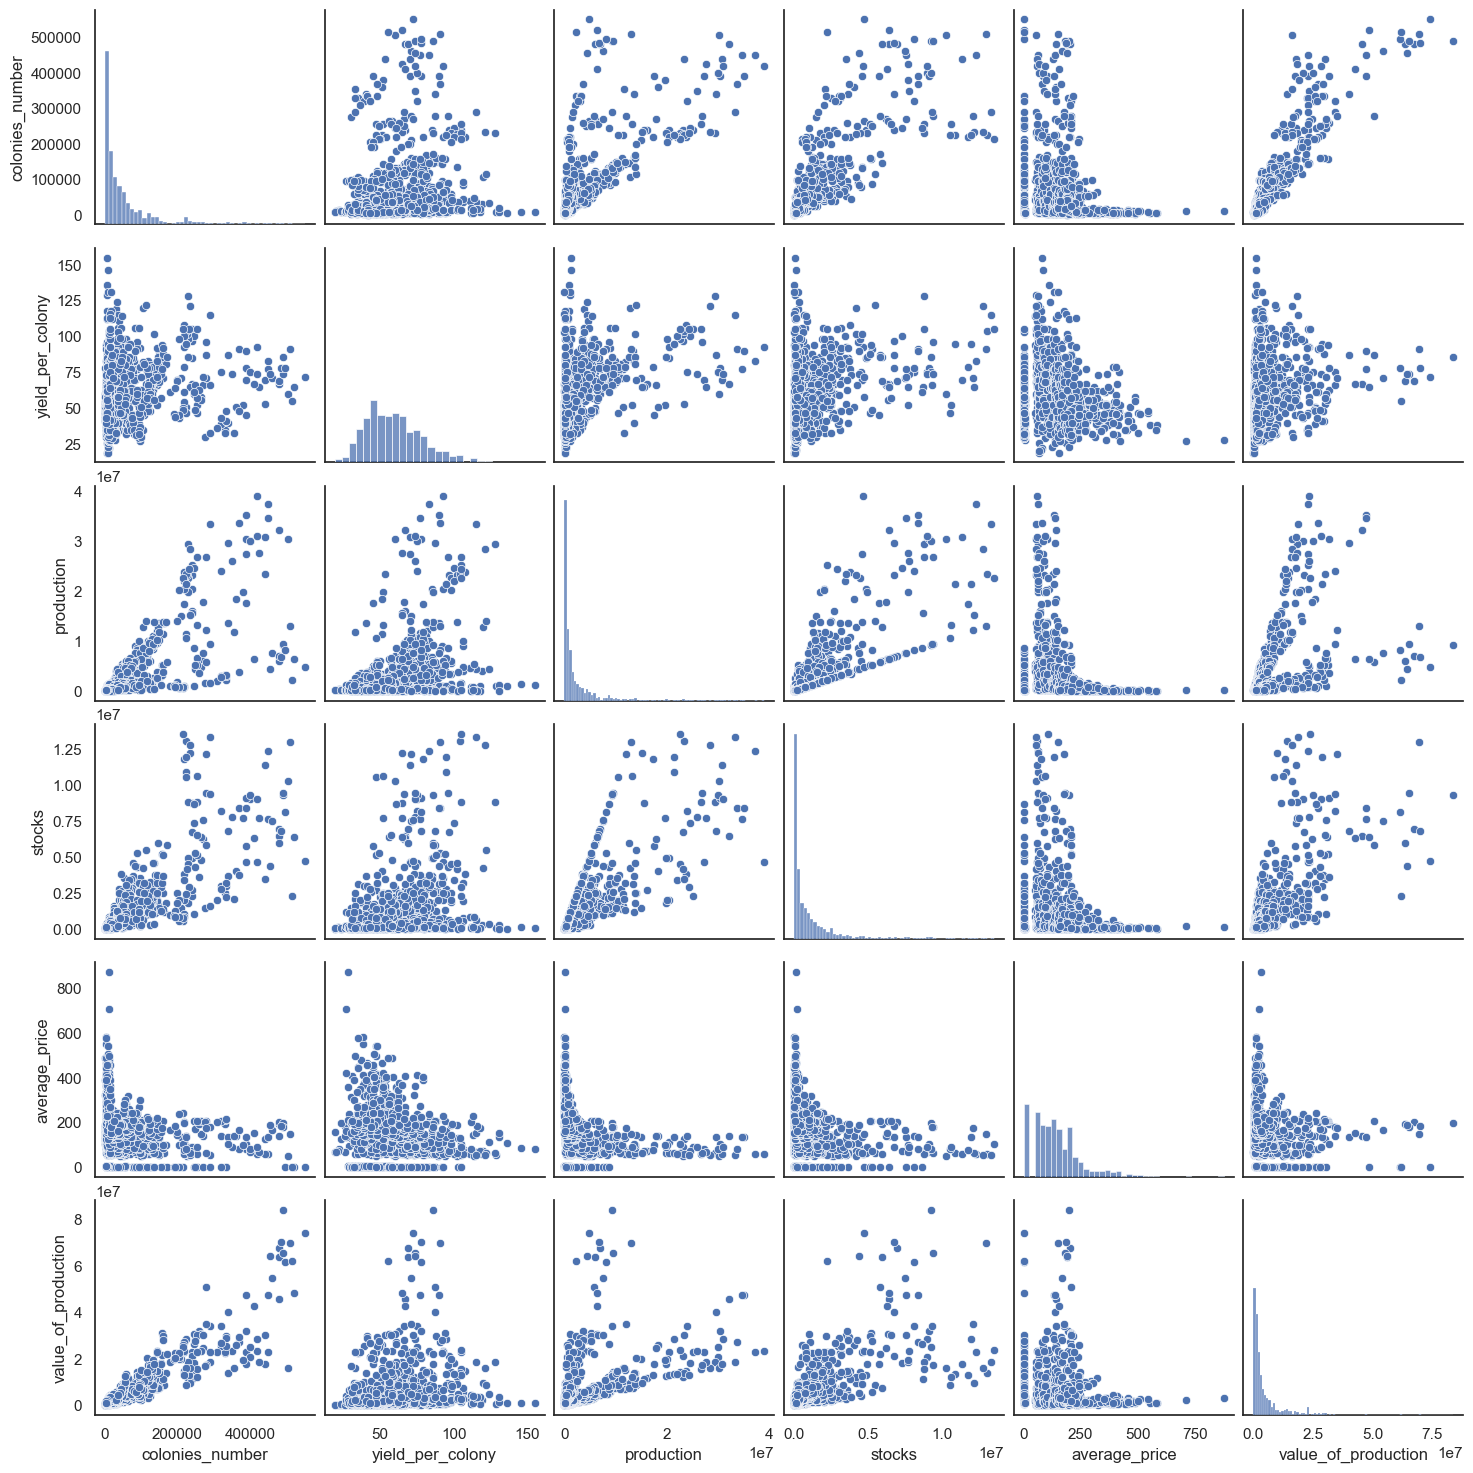

In [372]:
plt.figure(figsize = (20,8))
pp = sns.pairplot(df, vars=['colonies_number', 'yield_per_colony', 'production', 'stocks','average_price', 'value_of_production'])


## Checking correlation - heatmap()

In [373]:
corr_matrix = df[['colonies_number', 'yield_per_colony', 'production', 'stocks','average_price', 'value_of_production']].corr()
corr_matrix


,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
colonies_number,1.000000,0.201100,0.736643,0.800533,-0.165758,0.905332
yield_per_colony,0.201100,1.000000,0.413410,0.344385,-0.187149,0.210358
production,0.736643,0.413410,1.000000,0.807947,-0.194206,0.520972
stocks,0.800533,0.344385,0.807947,1.000000,-0.173171,0.689202
average_price,-0.165758,-0.187149,-0.194206,-0.173171,1.000000,-0.078820
value_of_production,0.905332,0.210358,0.520972,0.689202,-0.078820,1.000000


<Axes: >

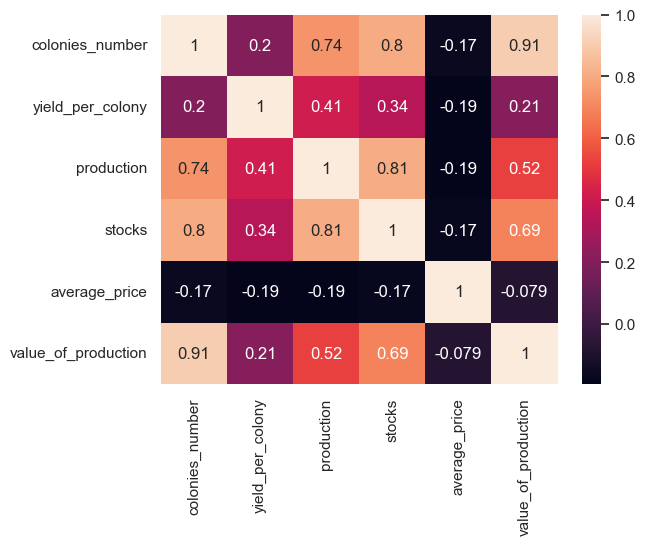

In [374]:
sns.heatmap(corr_matrix, annot=True)


### Insights:

Positive Correlation
1. "colonies_number" has very high positive correlation with "production", "stocks" and "value of production".
2. "production" has high positive correlation with "colonies_number" and "stocks" as well.

Negative Correlation
1. "average_price" has negative correlation with all the variables and need further investigation

#### Categorical variable analysis — year and state

In [376]:
v = df['year'].nunique()
u = df['state'].nunique()

print(f"{v} different year, {u} unique state")


27 different year, 44 unique state


Insights:
1. Honey production is spread accross 44 states throughout the period 1995-2021.

## Checking total Honey production with over the years — pointplot()

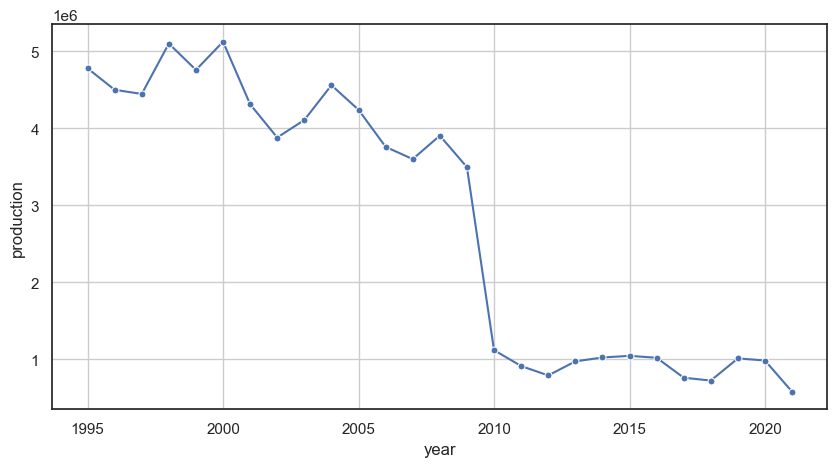

In [377]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, 
             x='year',
             y='production',
             marker='o',
             markersize=5,
             markerfacecolor='b',
             ci=None)
plt.grid()


Insights:
1. The total production over the years has been decresing.
2. It is connected to number of colonies and yeild per colony.
3. Product of both gives total production.

Further lets check with these variables.

## Checking number of colonies over the years — pointplot()

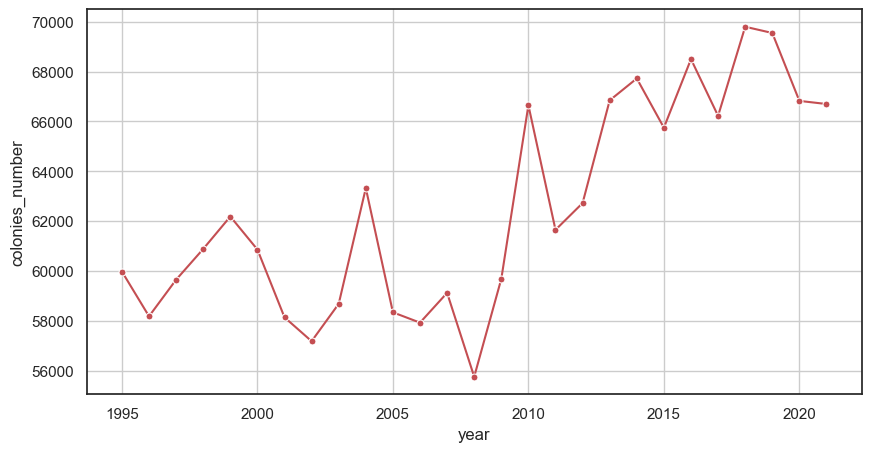

In [378]:
plt.figure(figsize=(10,5))
sns.lineplot(df, x = 'year', y = 'colonies_number',color = 'r' ,marker = 'o',markersize=5, markerfacecolor='r',ci=None)
plt.grid()


Insights:
1. The number of colonies saw a decrease up until 2008 and started to increase until 2018.
3. Looks like there was a change to increase colonies number in 2008 which has resulted in the same.
2. Though increasing we need to check the yield per colony to know more further.

## Checking yield per colony over the years — pointplot()

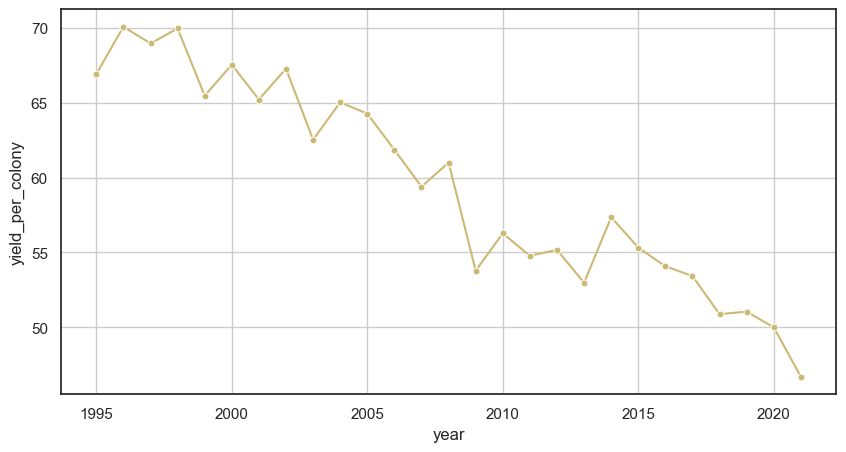

In [379]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, 
             x='year', 
             y='yield_per_colony',
             color='y',
             marker='o',
             markersize=5,
             markerfacecolor='y',
             ci=None)
plt.grid()


Insights:
1. The yield per colonies has a dcereasing trend over the years though the number of colonies has increased.


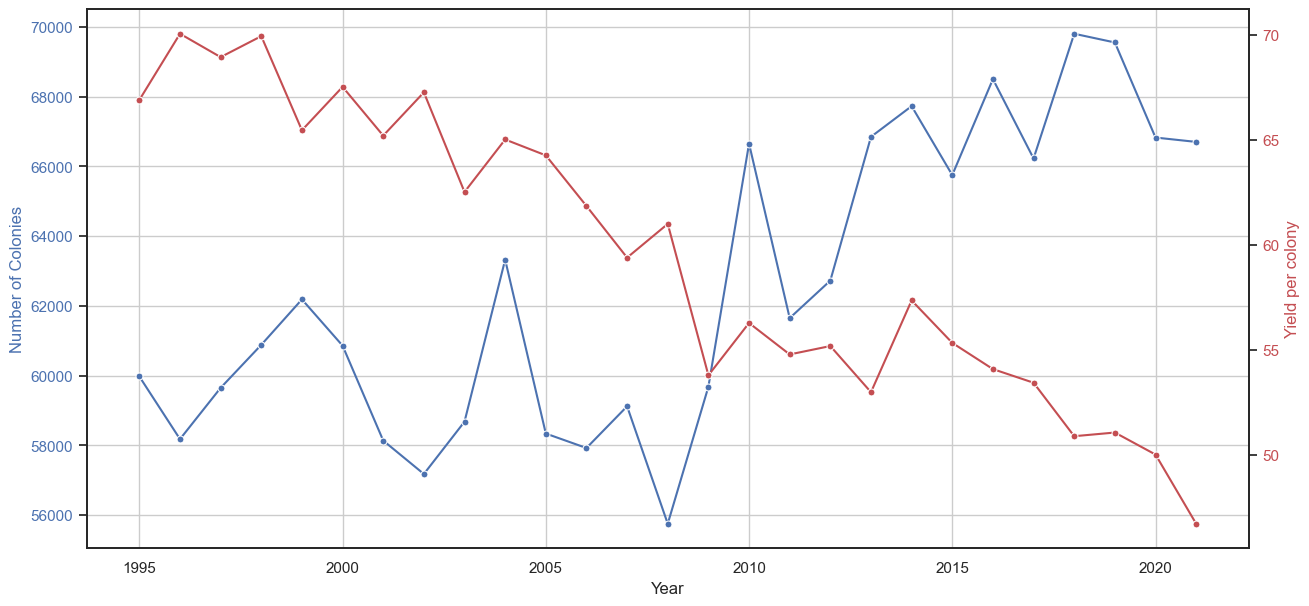

In [380]:
# figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(15, 7))

# first line plot
sns.lineplot(data=df, 
             x = 'year', 
             y = 'colonies_number',
             color = 'b', 
             marker = 'o', 
             markersize=5, 
             markerfacecolor='b',
             ax=ax1,
             ci=None)

# labels for the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Second line plot
sns.lineplot(df, x = 'year', y = 'yield_per_colony',color='r', marker = 'o',markersize=5, markerfacecolor='r',ax=ax2,ci=None)

# Labels for the second y-axis
ax2.set_ylabel('Yield per colony', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.grid()


### Insight :
1. Despite increase in number of colonies after year 2008, Yield per colony trend didn't changed.
2. This shows that yield per colony is the one which is causing the decrease in honey production and not number of colonies.
3. Looks like there is a strong reason behind this.

## Checking the total production in each state over the years

Text(0, 0.5, 'Total Production')

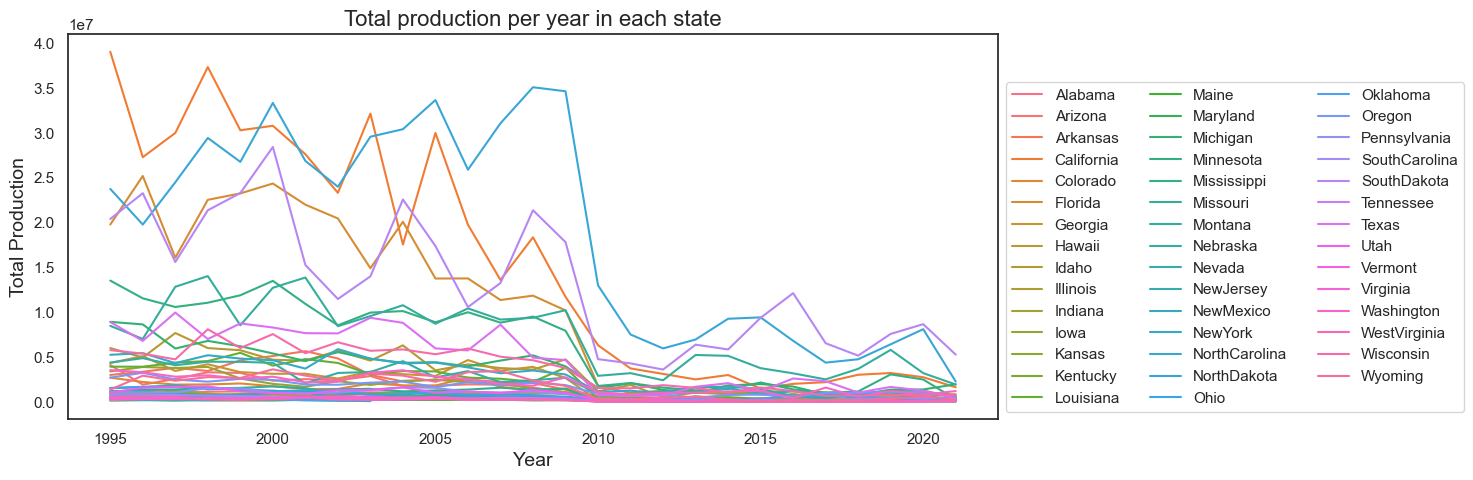

In [381]:
plt.figure(figsize=(12,5))
sns.lineplot(df, x = 'year', y = 'production',ci=None, hue = 'state')

plt.legend(loc='lower left',bbox_to_anchor=(1,0),ncol=3)
plt.title('Total production per year in each state', fontsize=16)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Production', fontsize=14)


Insights:
1. Many states have very low production over the years.
2. Some have moderate total production.
3. A few states have high production.Lets see further for each state more clearly.

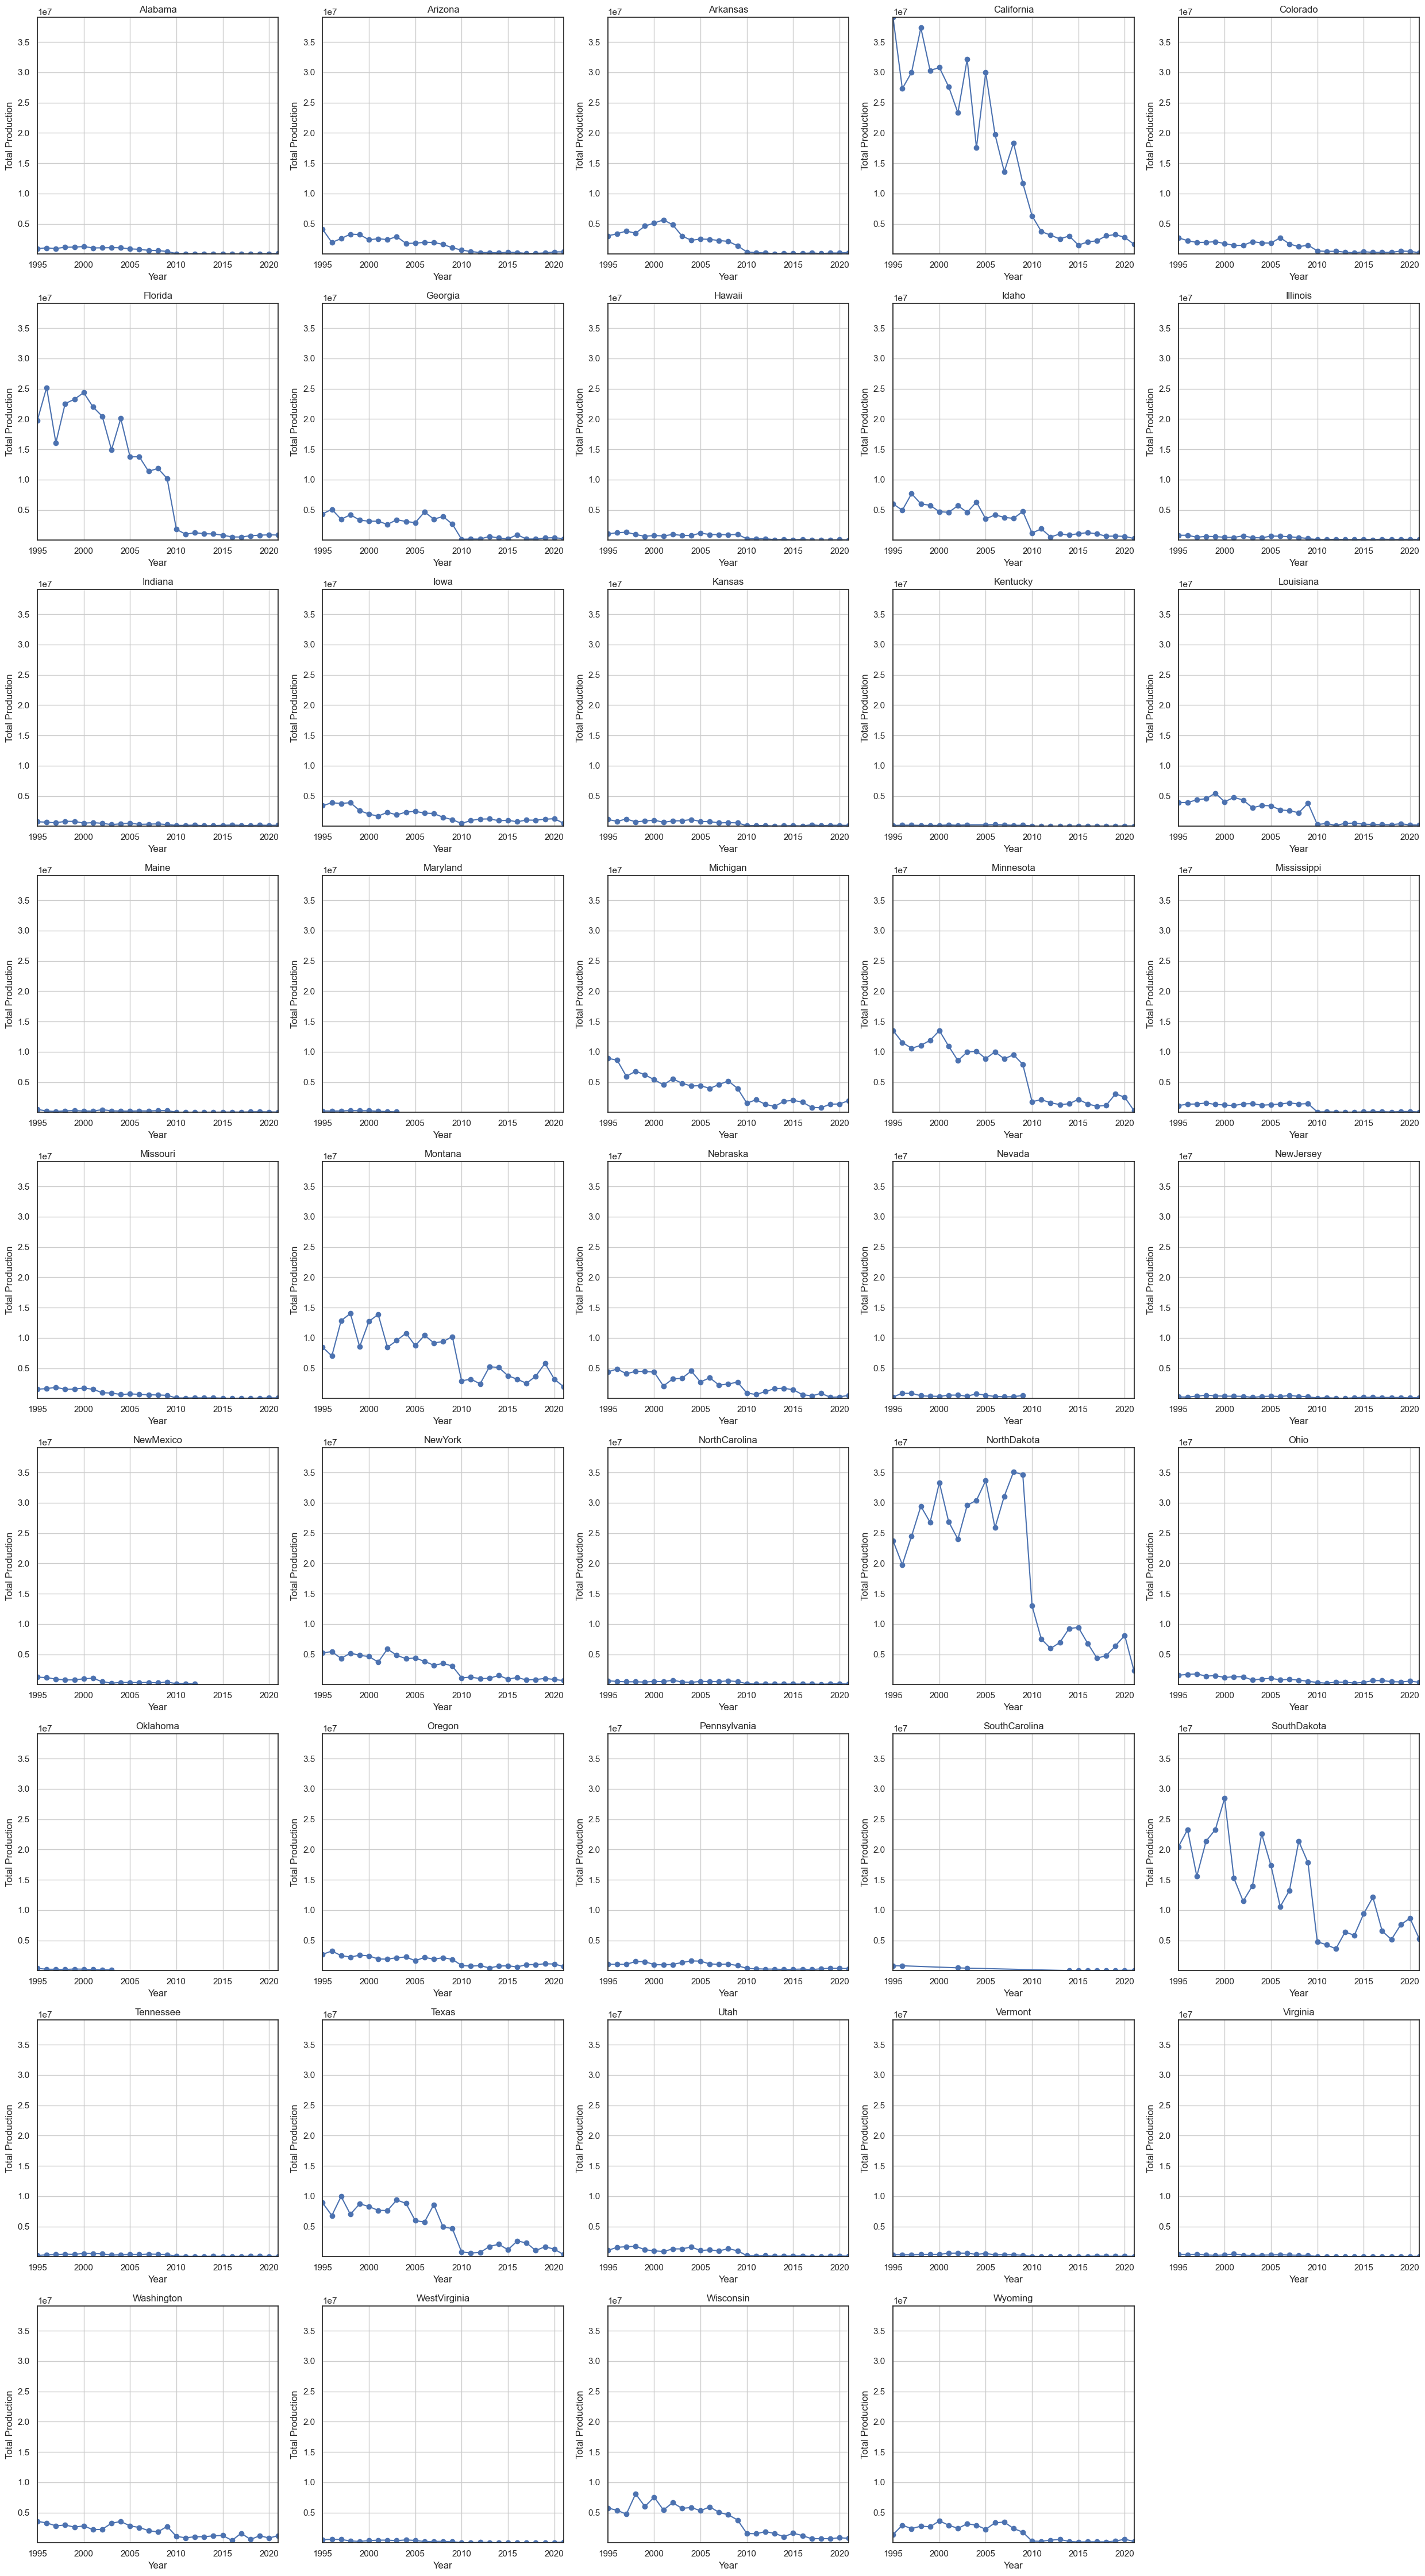

In [382]:
min_year = df['year'].min()
max_year = df['year'].max()
min_prod = df['production'].min()
max_prod = df['production'].max()

num_states = 44
rows = 9
cols = 5

# flexible figure size
default_fig_width = 5
default_fig_height = 5
fig_width = cols * default_fig_width
fig_height = rows * default_fig_height

fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

unique_states = df['state'].unique()

# Loop through to create subplots for each state
for i, state_name in enumerate(unique_states):
    if i >= num_states:
        break
    
    # Get the row and column index for the current subplot
    row = i // cols
    col = i % cols
    
    # Filter the data for the current state
    state_data = df[df['state'] == state_name]
    
    x = state_data['year']
    y = state_data['production']
    
    # Check if there is data to plot
    if not state_data.empty:
        axes[row, col].plot(x, y, marker='o', linestyle='-')
        axes[row,col].grid()

    else:
        print(f"No data for {state_name}")
    
    axes[row, col].set_title(state_name)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Total Production')
    
    # Set the axis limits for uniform scales
    axes[row, col].set_xlim(min_year, max_year)
    axes[row, col].set_ylim(min_prod, max_prod)

# Remove any empty subplots (if total number of states < 45)
for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()


Insights:
1. North Dakota,South Dakota,Florida,California,Montana — These states produce more honey than the others.
2. California has a decrease in production and also Florida has a decrease.
3. South dakota has been maintaing production initially and a decrease onwards.
4. In North Dakota also we can see a increase in production till 2008 and a strong decrease onwards.

## Checking the number of colonies in above 5 states’s in detail- catplot()

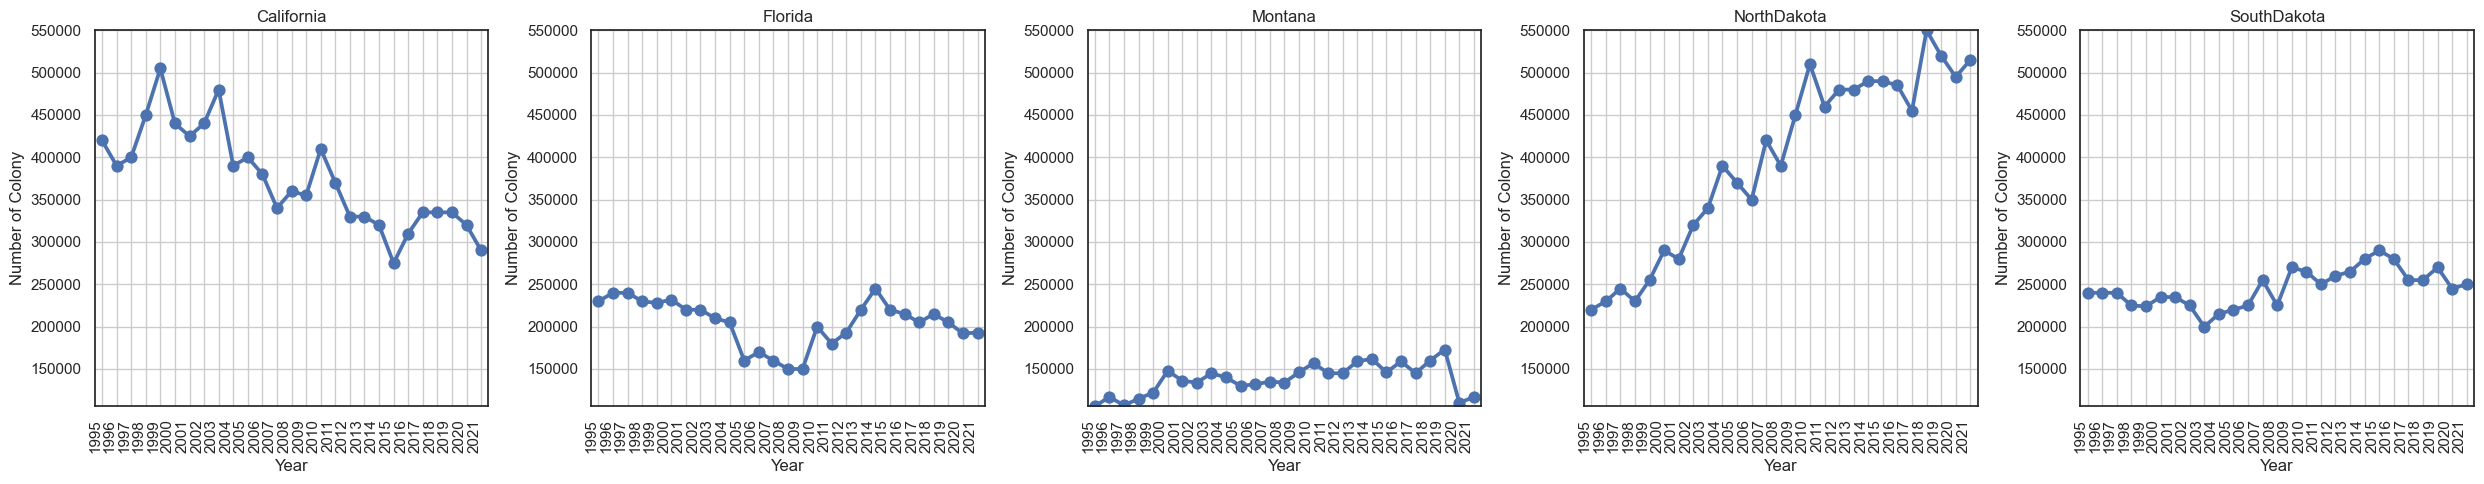

In [383]:
# List of the five states
states_of_interest = ['California', 'Florida', 'Montana', 'NorthDakota', 'SouthDakota']

# Filter the data for these five states
df_filtered = df[df['state'].isin(states_of_interest)]

# Determine the min and max values for the y-axis (total production)
min_prod = df_filtered['colonies_number'].min()
max_prod = df_filtered['colonies_number'].max()

# Create a 1x5 subplot structure
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Loop through the states and create a catplot for each
for i, state in enumerate(states_of_interest):
    # Filter data for the current state
    state_data = df_filtered[df_filtered['state'] == state]
    
    sns.pointplot(
        data=state_data,
        x='year',
        y='colonies_number',
        ax=axes[i],
        markers='o',
        linestyles='-'
    )
    
    axes[i].set_title(state)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Colony')
    axes[i].set_ylim(min_prod, max_prod)
    
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)
        label.set_horizontalalignment('right')
        axes[i].grid()

plt.tight_layout()


Insights:
1. The number of colonies in North dakota has been increasing over the years.
2. California has a decrease in number of colonies.
3. South dakota,Florida and Montana has seen has no much change in number of colonies.

## Checking the yield per colony in above 5 states’s in detail- catplot()

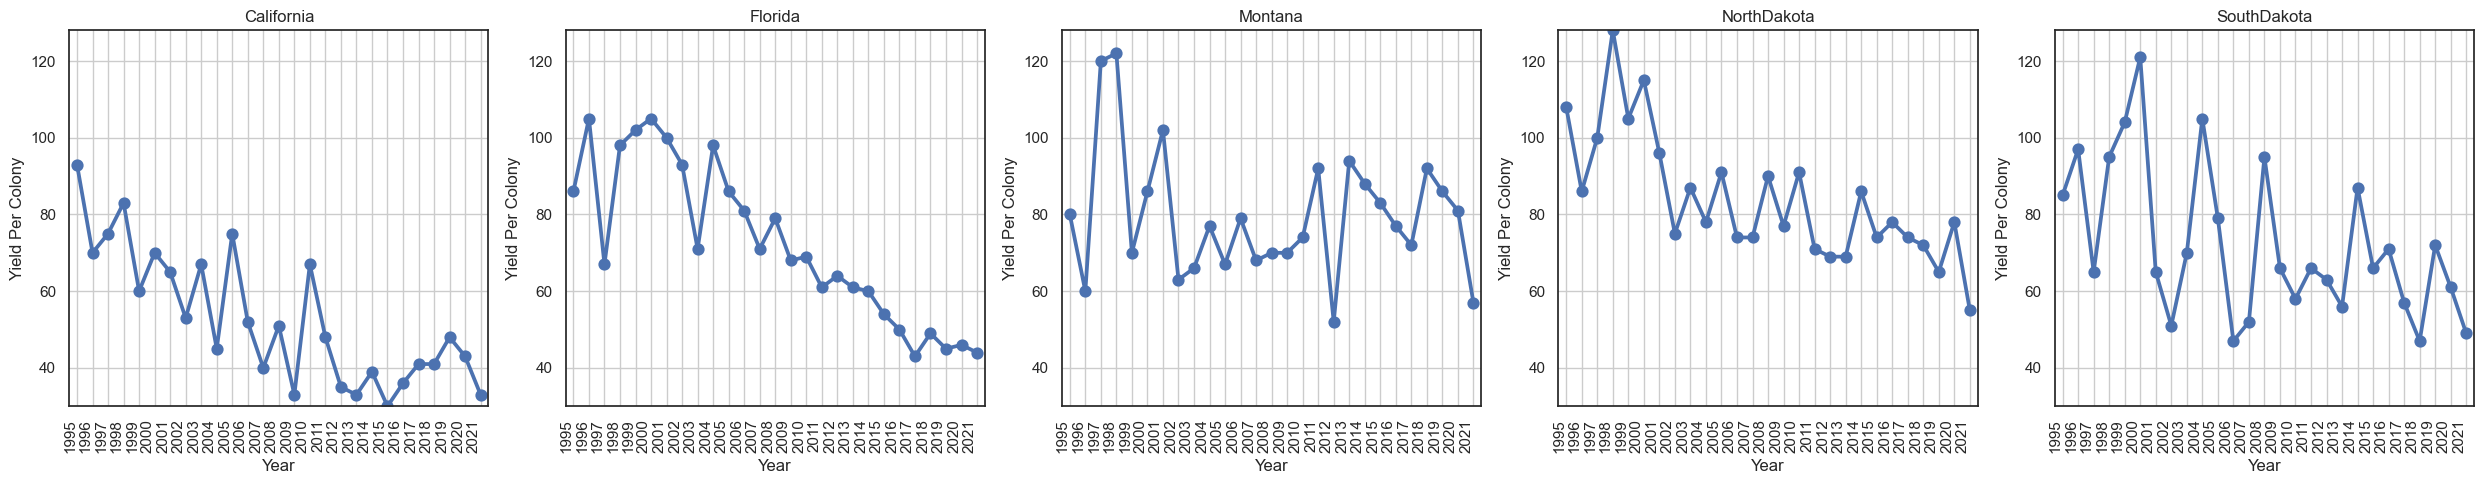

In [384]:
# List of the five states
states_of_interest = ['California', 'Florida', 'Montana', 'NorthDakota', 'SouthDakota']

# Filter the data for these five states
df_filtered = df[df['state'].isin(states_of_interest)]

# Determine the min and max values for the y-axis (total production)
min_prod = df_filtered['yield_per_colony'].min()
max_prod = df_filtered['yield_per_colony'].max()

# Create a 1x5 subplot structure
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Loop through the states and create a catplot for each
for i, state in enumerate(states_of_interest):
    # Filter data for the current state
    state_data = df_filtered[df_filtered['state'] == state]
    
    sns.pointplot(
        data=state_data,
        x='year',
        y='yield_per_colony',
        ax=axes[i],
        markers='o',
        linestyles='-'
    )
    
    axes[i].set_title(state)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Yield Per Colony')
    axes[i].set_ylim(min_prod, max_prod)
    
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)
        label.set_horizontalalignment('right')
        axes[i].grid()

plt.tight_layout()


Insights:
1. The Yield per colony in California, Florida and North dakota has been decreasing over the years.
2. The remaining states also have a decreasing trend over the years but not that strong.

## Checking the Value of Production over the years

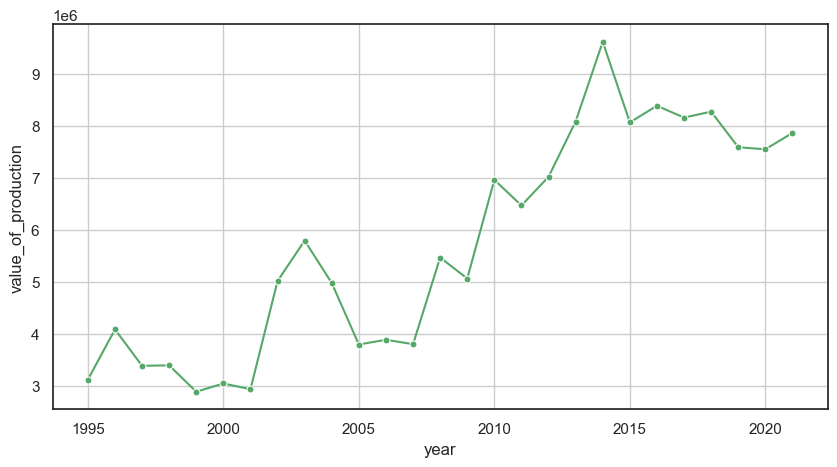

In [385]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df, 
    x='year', 
    y='value_of_production', 
    marker='o',
    markersize=5, 
    markerfacecolor='g',
    ci=None, 
    color='g')
plt.grid()


Insights:
1. Though there is a decrease in the yield per colony we can see that there is an increase in the value of production per pound.
2. This show a price elasticity ie due to an increase in demand and supply being less, the value of production per pound of honey has increased over the years.

## Check for each state the stocks and total production details

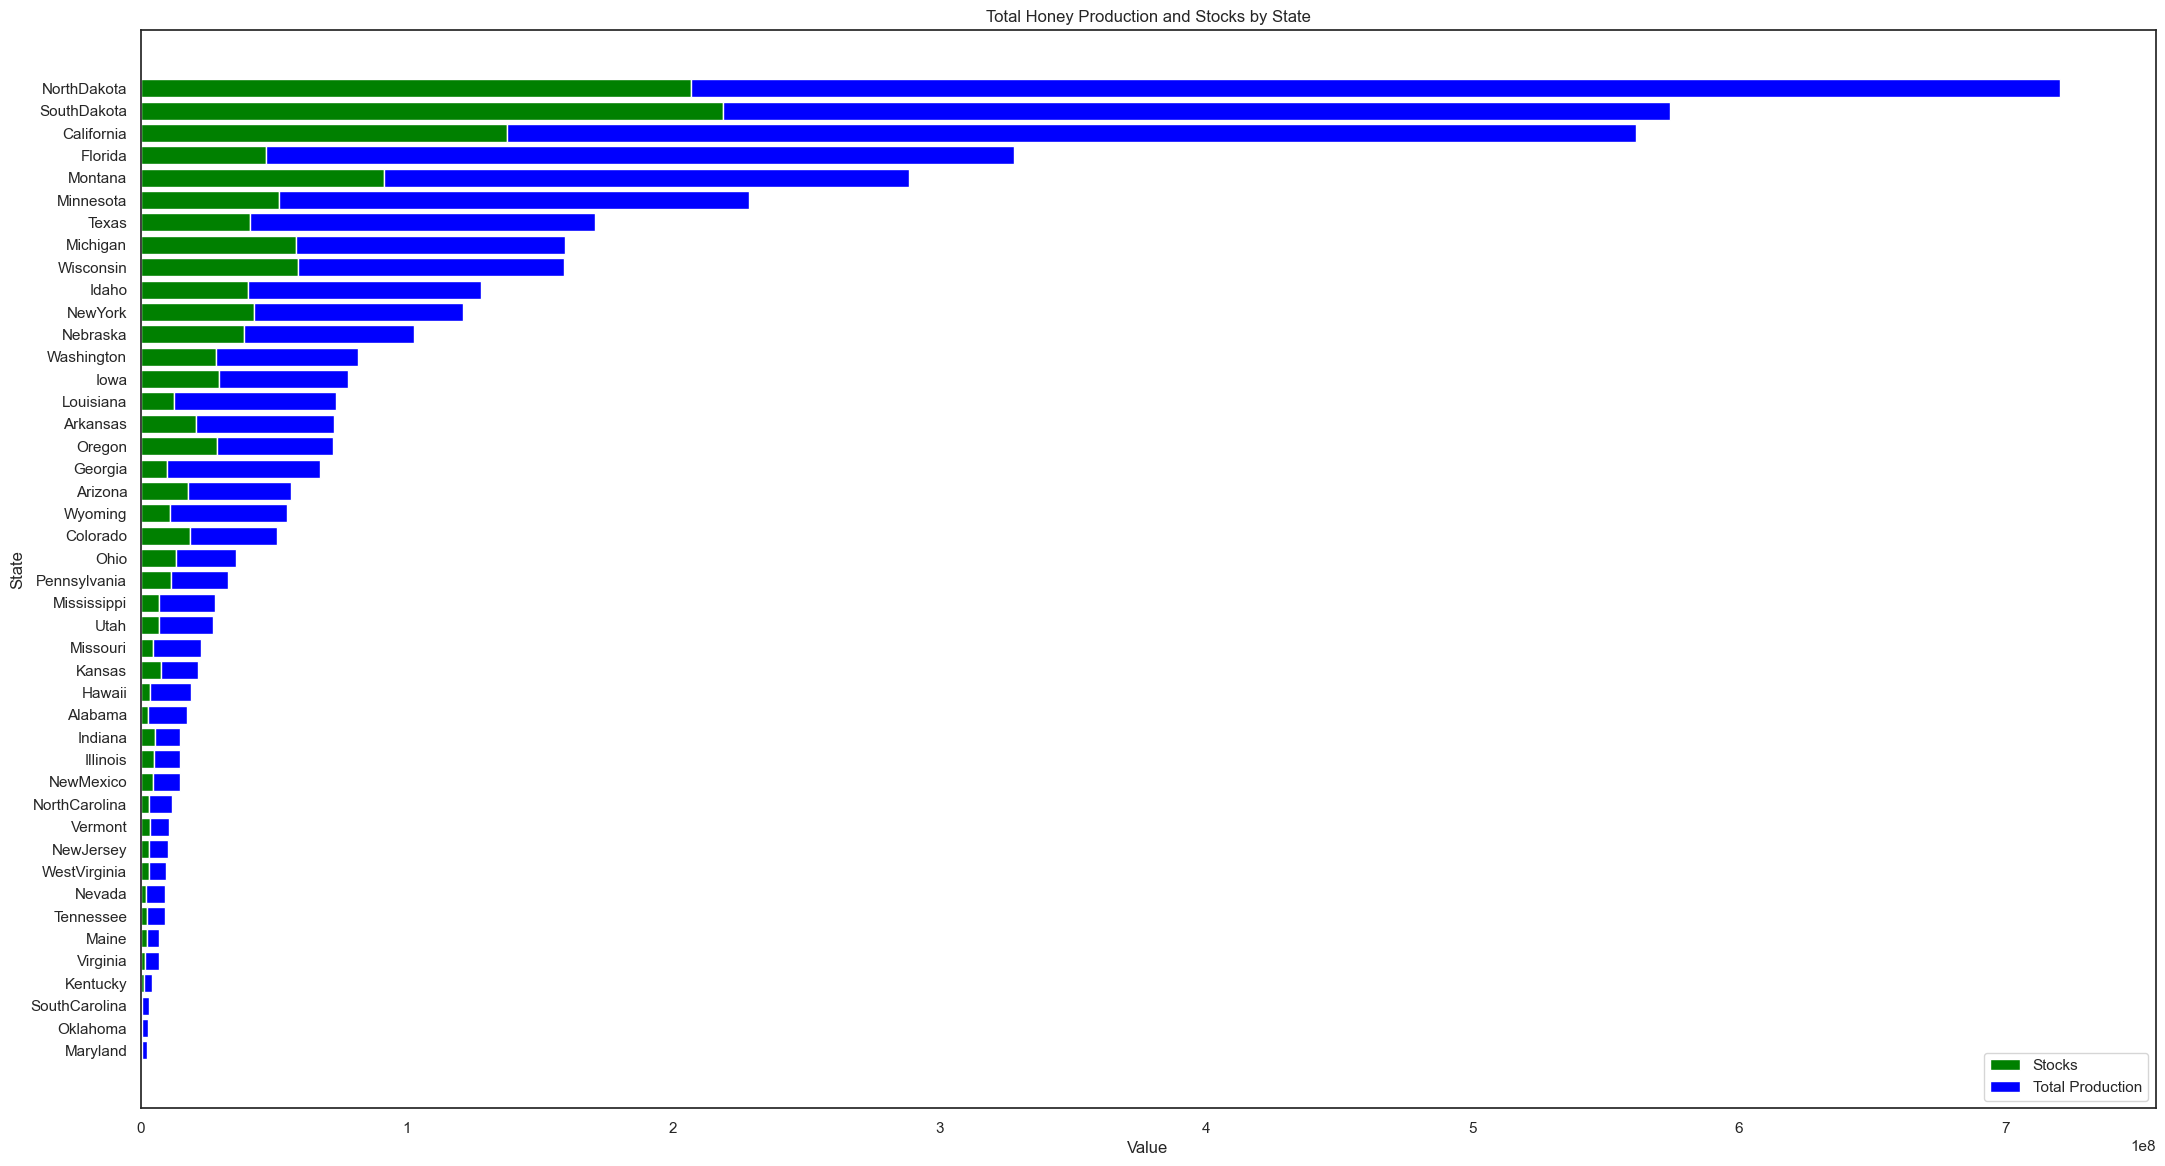

In [352]:
df_total = df.groupby('state', as_index=False)[['production', 'stocks']].sum()

df_total['total'] = df_total['production'] + df_total['stocks']
df_total = df_total.sort_values(by='total', ascending=True)

fig, ax = plt.subplots(figsize=(26, 14))

# Plot stocks
bar1 = ax.barh(df_total['state'], df_total['stocks'], color='green', label='Stocks')

# Plot production stacked on top of stocks
bar2 = ax.barh(df_total['state'], df_total['production'], left=df_total['stocks'], color='blue', label='Total Production')

ax.set_xlabel('Value')
ax.set_ylabel('State')
ax.set_title('Total Honey Production and Stocks by State')
ax.legend(loc='lower right')


Insights:
1. Florida has less stock and more production which makes it is very efficient.
2. North has Dakota total production more than South Dakota even with high production value.
3. Texas sells more and manages stocks less when compared to Michigan and Wisconsin.

## Check the distribution of average price per pound of honey

Text(0.5, 1.0, 'Distribution of Average Price of Honey')

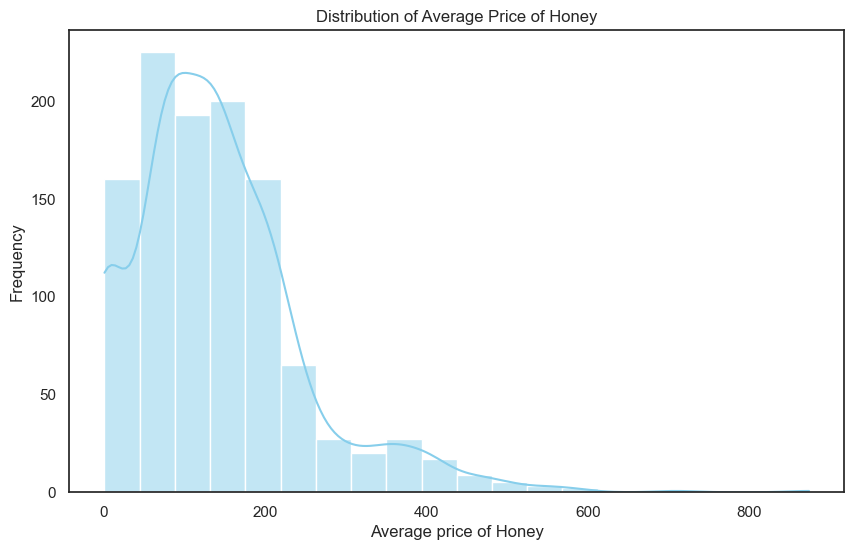

In [386]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['average_price'], kde=True, color='skyblue', bins=20)

plt.xlabel('Average price of Honey')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price of Honey')


Text(0.5, 1.0, 'Distribution of Average Price of Honey')

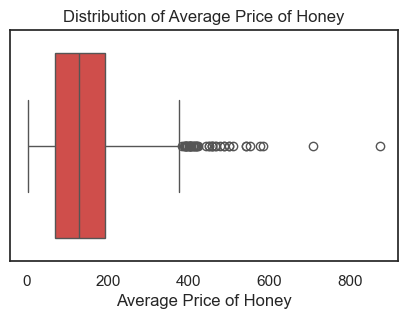

In [387]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['average_price'], color='#E53935')

plt.xlabel('Average Price of Honey')
plt.title('Distribution of Average Price of Honey')


In [388]:
df.average_price.median()


128.0

Insights:
1. Average Price has a right skew visual with many outliers for the higher prices
2. The median value is about 128.0

## Average Price across states

Text(25, 129.0, 'Price = 128.0')

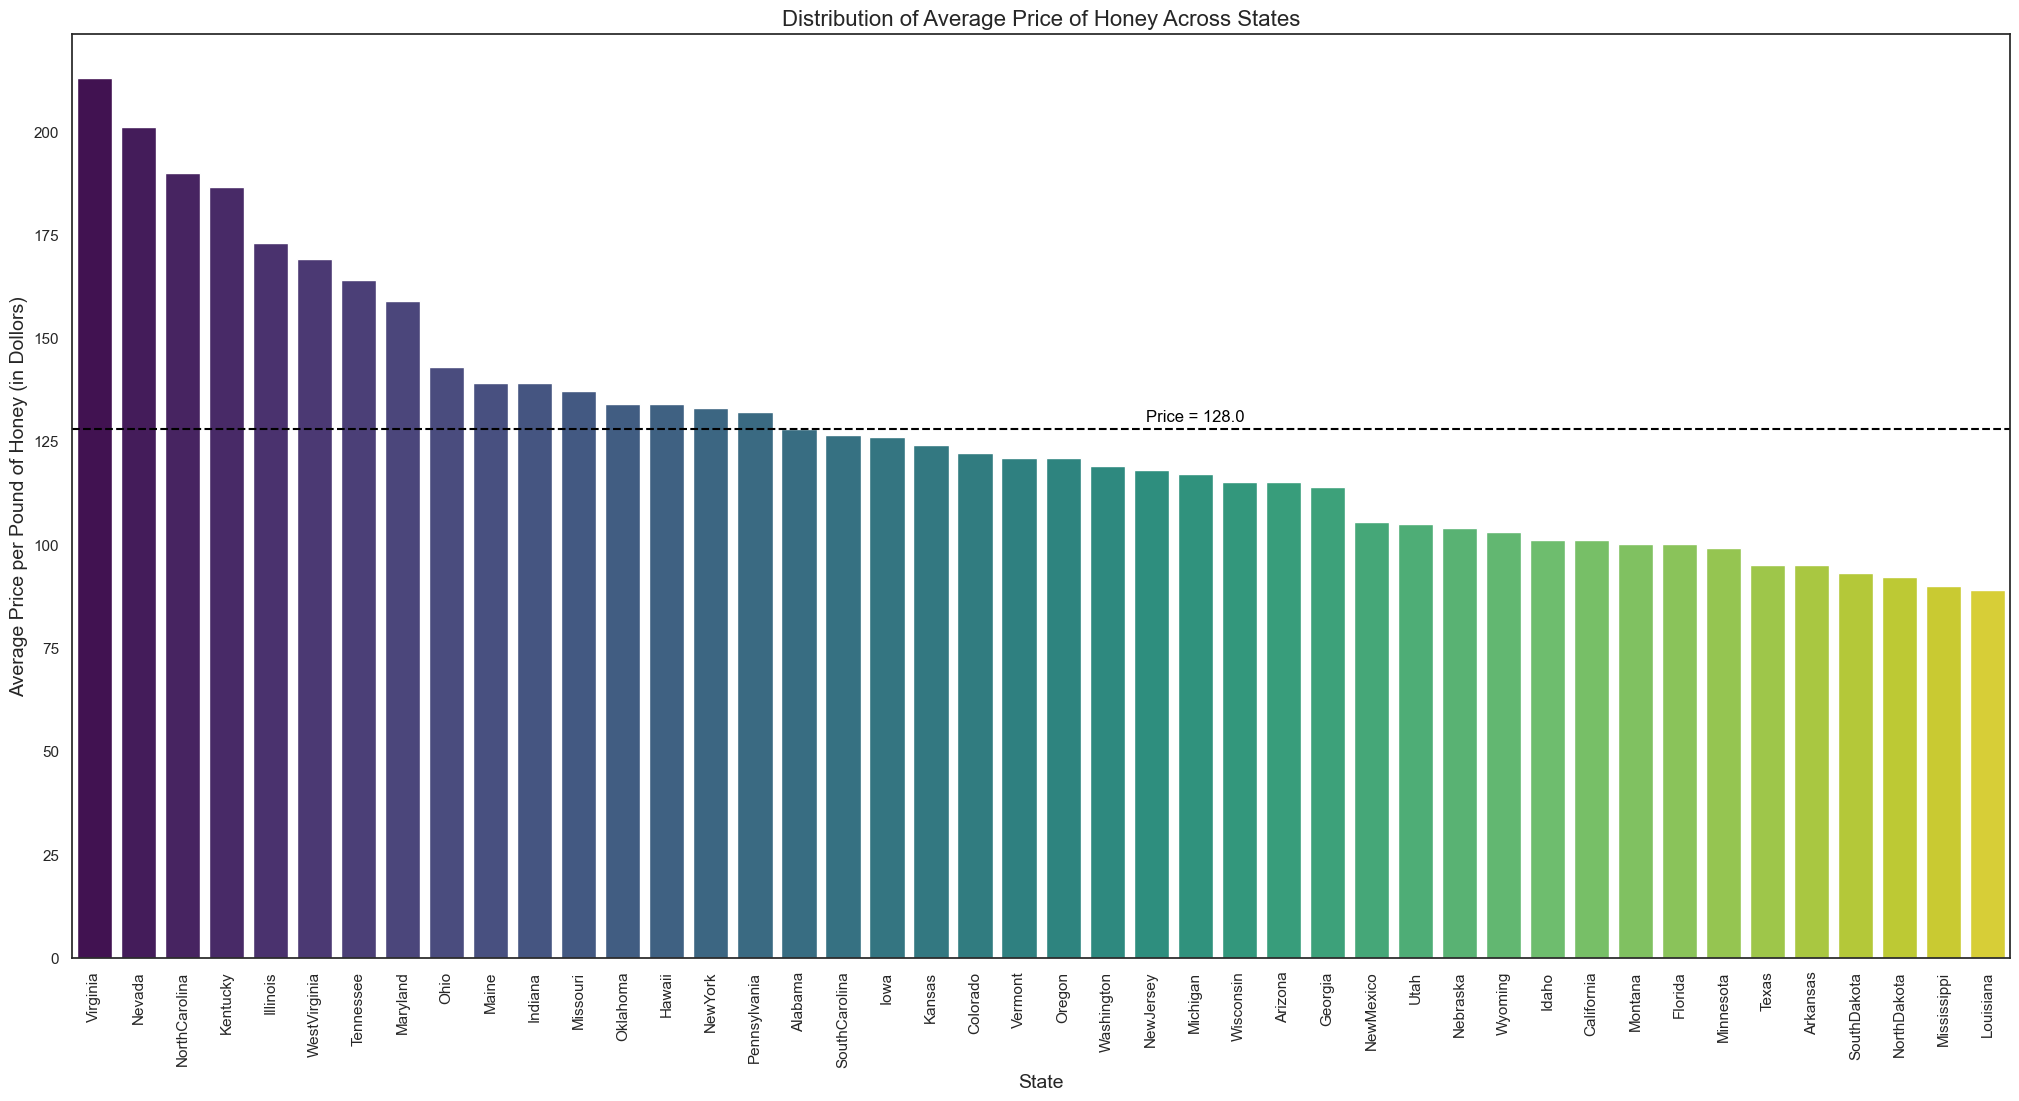

In [389]:
plt.figure(figsize=(25, 12))  # Adjusted figure size

# Median price per pound of honey for each state
median_price_per_lb = df.groupby('state')['average_price'].median().sort_values(ascending=False)

sns.barplot(x=median_price_per_lb.index, y=median_price_per_lb.values, palette='viridis')

plt.xlabel('State', fontsize=14)
plt.ylabel('Average Price per Pound of Honey (in Dollors)', fontsize=14)
plt.title('Distribution of Average Price of Honey Across States', fontsize=16)

plt.xticks(rotation=90)
avg = df.average_price.median()
plt.axhline(y=avg, color='black', linestyle='--')
plt.text(25, avg + 1, f'Price = {avg}', color='black', ha='center', va='bottom')


Insights:
1. Virginia state has the highest price per pound of honey.
2. The average 128 falls only at lower in the major honey producing states is seen in the lower end.

# Final Conclusions
1. The reason for decrease in total production in honey in USA is because of the yield per colony decrease.
2. Though there was a decrease in production the value of production per pound has increased.
3. Among all the states “Montana”, ”California”, ”Florida”, ”South Dakota” and “North Dakota” produce more honey.
4. Among these 5 states North Dakota sells more but Florida efficiently manages stock and has sold more.